# Multi Period Returns

In [3]:
prices_a = [10,15,13,9]
prices_a[1:] # everything except the first one
prices_a[:-1] # everything except the last one

[10, 15, 13]

In [4]:
import numpy as np

In [5]:
prices = np.array(prices_a)
prices

array([10, 15, 13,  9])

In [6]:
prices[1:]/prices[:-1] -1 # it works because we are working with numpy arrays.

array([ 0.5       , -0.13333333, -0.30769231])

In [7]:
import pandas as pd

In [8]:
prices = pd.DataFrame({"BLUE": [1,2,3], "ORANGE": [4,5,6]})
prices

,BLUE,ORANGE
0,1,4
1,2,5
2,3,6


## Method 1: values()

In [9]:
prices.iloc[1:].values/prices.iloc[:-1] - 1

,BLUE,ORANGE
0,1.0,0.25
1,0.5,0.20


In [10]:
prices.iloc[1:]/prices.iloc[:-1].values - 1

,BLUE,ORANGE
1,1.0,0.25
2,0.5,0.20


## Method 2: shift()

In [11]:
prices/prices.shift(1) - 1

,BLUE,ORANGE
0,NaN,NaN
1,1.0,0.25
2,0.5,0.20


## Method 3: pct_change()

In [12]:
prices.pct_change()

,BLUE,ORANGE
0,NaN,NaN
1,1.0,0.25
2,0.5,0.20


In [13]:
import yfinance as yf

In [14]:
msft = yf.Ticker("MSFT")
prices = pd.DataFrame(msft.history(period="1mo")['Close'])
prices.reset_index(inplace=True)
prices['Date'] = prices['Date'].dt.date
prices.set_index('Date', inplace=True)
prices.head()

,Close
Date,
2023-06-08,325.260010
2023-06-09,326.790009
2023-06-12,331.850006
2023-06-13,334.290009
2023-06-14,337.339996


In [15]:
returns = prices.pct_change()

<Axes: xlabel='Date'>

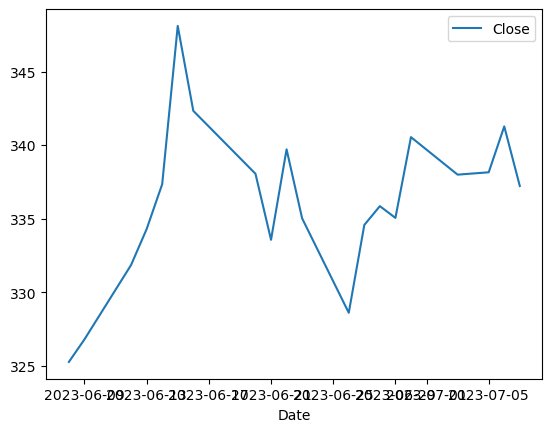

In [16]:
prices.plot()

<Axes: xlabel='Date'>

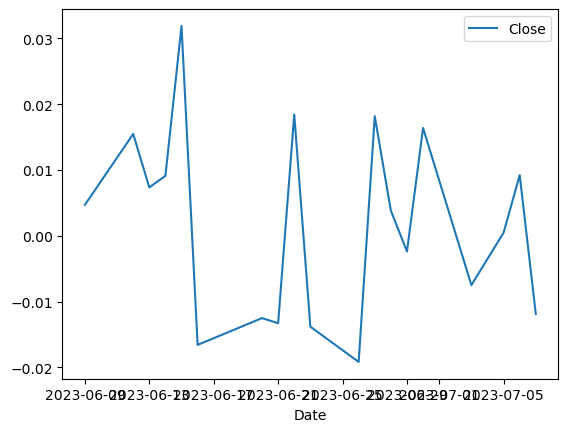

In [17]:
returns.plot()

<Axes: xlabel='Date'>

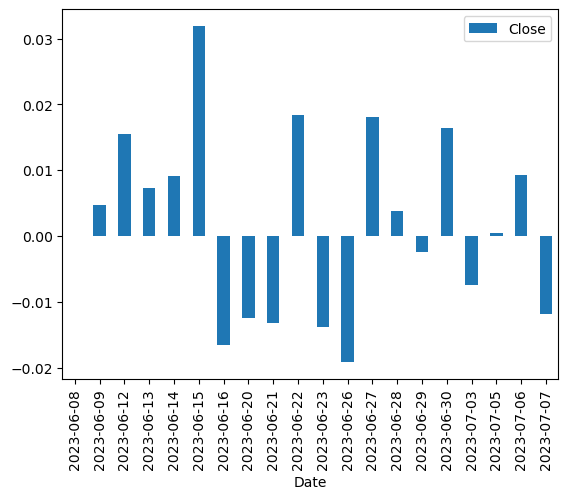

In [18]:
returns.plot.bar()

In [19]:
returns.std()

Close    0.014428
dtype: float64

In [20]:
returns.mean()

Close    0.002001
dtype: float64

# Annualized Returns

In [21]:
(returns+1).dropna().head() # dropna() drops NaN rows

,Close
Date,
2023-06-09,1.004704
2023-06-12,1.015484
2023-06-13,1.007353
2023-06-14,1.009124
2023-06-15,1.031897


In [22]:
np.prod(returns+1) # multiply each column

Close    1.036771
dtype: float64

In [23]:
compound_return = np.prod(returns+1) - 1
compound_return

Close    0.036771
dtype: float64

In [24]:
(returns+1).prod() - 1

Close    0.036771
dtype: float64

In [25]:
monthly_ret = 0.01
((1+monthly_ret)**12 - 1) * 100

12.682503013196978

In [26]:
quarterly_ret = 0.04
((1+quarterly_ret)**4 - 1) * 100

16.98585600000002

In [27]:
daily_ret = 0.0001
(1+daily_ret)**252 - 1

0.025518911987694626

In [28]:
(returns+1).dropna().head() # dropna() drops NaN rows

np.prod(returns+1) # multiply each column

compound_return = np.prod(returns+1) - 1
compound_return

(returns+1).prod() - 1

monthly_ret = 0.01
((1+monthly_ret)**12 - 1) * 100

quarterly_ret = 0.04
((1+quarterly_ret)**4 - 1) * 100

daily_ret = 0.0001
(1+daily_ret)**252 - 1

0.025518911987694626

# Variance and Standard Deviation

In [29]:
returns.std()

Close    0.014428
dtype: float64

In [30]:
deviations = returns - returns.mean()
squared_deviations = deviations**2
variance = squared_deviations.mean()
volatility = np.sqrt(variance) # variance**0.5
volatility

Close    0.014043
dtype: float64

The two values don't match exactly. `std()` method uses $N-1$ while our method uses $N$ when we compute `mean()`. In other words, there is a difference between Sample STD and Population STD.

In [31]:
deviations = returns - returns.mean()
squared_deviations = deviations**2
num_obs = returns.dropna().shape[0]
variance = squared_deviations.sum()/(num_obs - 1)
volatility = np.sqrt(variance)
volatility

Close    0.014428
dtype: float64

In [32]:
returns.std()

Close    0.014428
dtype: float64

We can confirm that now the two values are matched with $0.014428$.

# Annualized Volatility

In [33]:
returns.std()*np.sqrt(252)

Close    0.229035
dtype: float64

In [34]:
returns.std()*(252**0.5)

Close    0.229035
dtype: float64

# Fama French: Working with Imported Data

In [48]:
returns = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",header=0, index_col=0, parse_dates=True, na_values=-99.99)
columns = ['Lo 10', 'Hi 10']
returns = returns[columns]/100
returns.columns = ['SmallCap', 'LargeCap'] # change column names
returns.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


<Axes: >

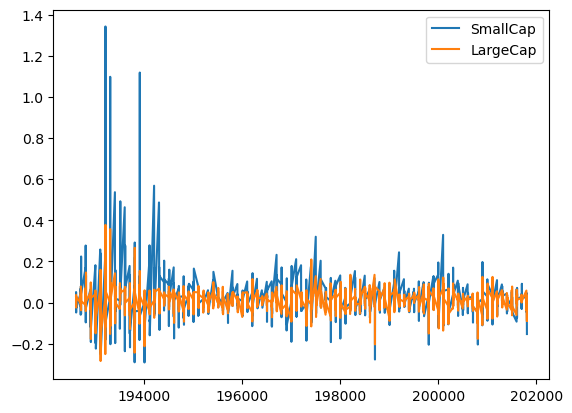

In [49]:
returns.plot.line()

In [46]:
returns.std()

SmallCap    0.106288
LargeCap    0.053900
dtype: float64

In [50]:
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [52]:
n_months = returns.shape[0]
return_per_month = (returns+1).prod()**(1/n_months) - 1 # return per month
return_per_month

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

In [53]:
annualized_return = (return_per_month + 1)**12 - 1
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [55]:
annualized_return = (returns+1).prod()**(12/n_months) - 1 # simpler way of computing annualized return
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [56]:
annualized_return / annualized_vol

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

In [57]:
riskfree_rate = 0.03
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return / annualized_vol
sharpe_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64